
## Data Processing and Analysis of Titanic Dataset

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) 

In [3395]:
import pandas as pd
import numpy as np
import csv

def read_file(filepath):
    df = pd.read_csv(filepath)
    return df

df = read_file("train.csv")
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Step 1) Write a function that returns the number of rows that have at least one empty column value 

In [3396]:
def num_nans(df):
    return sum(df.apply(lambda row : sum(row.isnull().values), axis = 1) > 0)

print("there are " +  str(num_nans(df)) + " rows with at least one empty value")

there are 708 rows with at least one empty value


Step 2) Write a function that removes all columns with more than 200 NaN values 

In [3397]:
def drop_na(df):
    null_values = df.isnull().sum()
    null_index = null_values[null_values > 200].index
    print("Deleted", df[null_index])
    df.drop(null_index, axis = 1, inplace = True)
    return df
            
# tests
df1 = drop_na(df)

for col_name in df1.columns:
    print(col_name)


Deleted     Cabin
0     NaN
1     C85
2     NaN
3    C123
4     NaN
..    ...
886   NaN
887   B42
888   NaN
889  C148
890   NaN

[891 rows x 1 columns]
PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


Step 3) Write a function that replaces `male` with 0 and `female` with 1 

In [3398]:
print(df['Sex'])

def to_numerical(df):
    df['Sex'].replace(['female','male'], [1,0], inplace=True)
    return df['Sex']


df['Sex'] = to_numerical(df)
print(df['Sex'])


0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64


Step 4)  Write a function that adds four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column. 

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

In [3399]:
# Test
#print(df['Name'])
#print(df['Name'].str.split('.'))


def extract_names(df):
    df[['Last Name', 'Rest1']] = df['Name'].str.split(',', expand = True)
    df[['Title', 'Rest2', 'None1']] = df['Rest1'].str.split('.', expand = True)
    split = df['Rest2'].str.split(' ', expand = True)
    df['First Name'] = split[1]
    df['Middle Name'] = split[2]
    df.drop('Rest1', inplace=True, axis=1)
    df.drop('Rest2', inplace=True, axis=1)
    df.drop('None1', inplace=True, axis=1)
    return df[['First Name', 'Middle Name', 'Last Name', 'Title']]

    
    
    #print(df[['Last Name', 'Rest1']])
    #print(df[['Title', 'Rest2', 'None1']])
    

df[['First Name', 'Middle Name', 'Last Name', 'Title']] = extract_names(df)
df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry


Step 5) Write a function that replaces all missing ages with the average age 

In [3400]:
print(df['Age'])
def replace_with_mean(df):
    mean_age = df['Age'].mean()
    df['Age'].replace(np.nan, mean_age, inplace = True)
    return df['Age']# your code here

df['Age'] = replace_with_mean(df)
print(df['Age'])


0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64
0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64


The next parts of the project focus on visualization. Pandas and [matplotlib](https://pypi.org/project/matplotlib/) is used for all plotting.

Step 6) Plot a bar chart of the average age of those that survived and did not survive. 

28.54977812177503
30.415099646415896


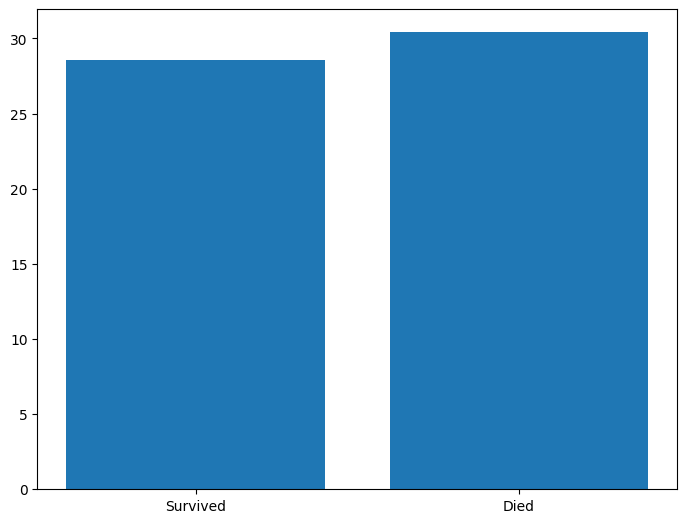

"\nmean_list = {'Survived' : mean_survived, 'Died': mean_died}\n\nx_values = list(mean_list.keys())\ny_values = list(mean_list.values())\nprint(x_values)\n\nax = df.plot.bar(x = x_values, y = y_values)\n"

In [3401]:

import matplotlib.pyplot as plt

def mean(list):
    sum_list = sum(list)
    len_list = len(list)
    return (sum_list/len_list)

list_survived = []
list_died = []

for i in range(len(df['Survived'])):
    if df['Survived'][i] == 1:
        list_survived.append(df['Age'][i])
    else:
        list_died.append(df['Age'][i])

mean_survived = mean(list_survived)
mean_died = mean(list_died)
print(mean_survived)
print(mean_died)

mean_list = {'Survived' : mean_survived, 'Died': mean_died}

x_values = list(mean_list.keys())
y_values = list(mean_list.values())

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(x_values, y_values)
plt.show()




-> Average age of those who died is larger than that of who survived. This could be because they gave prefernce to kids and the older population have a lower survival rate when it comes to surviving a calamity such as this one. Women and Children were given top priority for being rescued.

Step 7) Plot a bar chart of the proportion that survived for male and female. 

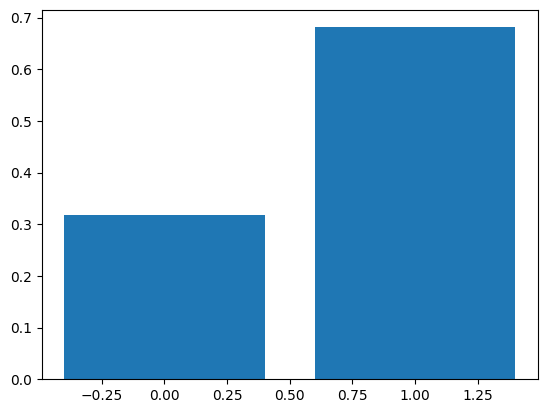

In [3402]:
Survived = df[df['Survived'] == 1]
group = Survived.groupby('Sex')['Survived'].count()
total = Survived['Survived'].count()
plt.bar(group.index, group.div(total))
plt.show()


Sex         0    1
Survived          
0         468   81
1         109  233
0.7420382165605095
0.18890814558058924


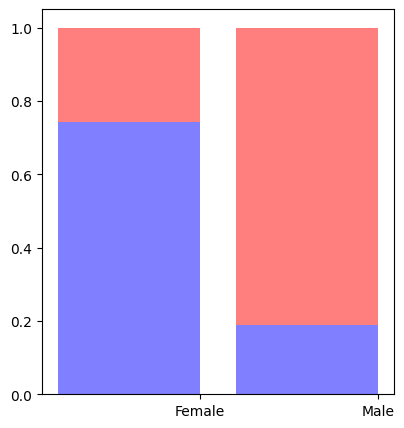

In [3403]:

# visualize proportions
proportions = pd.crosstab(df['Survived'],df['Sex'])
print (proportions)

# finding ratios
num_male_survived = 0
num_female_survived = 0
total_male = 0
total_female = 0


# counting female and male survivers:
for i in range(len(df['Survived'])):
    if (df['Survived'][i] == 1) and (df['Sex'][i] == 1):
        num_female_survived += 1
    elif (df['Survived'][i] == 1) and (df['Sex'][i] == 0):
        num_male_survived += 1

for gender in df['Sex']:
    if gender == 1:
        total_female += 1
    elif gender == 0:
        total_male += 1

# finding ratios:
ratio_female_survived = num_female_survived/ total_female
print(ratio_female_survived)
ratio_female_died = 1 - ratio_female_survived
ratio_male_survived = num_male_survived/ total_male
print(ratio_male_survived)
ratio_male_died = 1 - ratio_male_survived


# plot
data_survived = [ratio_female_survived, ratio_male_survived ]
data_died = [ratio_female_died, ratio_male_died]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.bar(range(len(data_survived)), data_survived, label='Survived', alpha=0.5, color='b')
ax1.bar(range(len(data_died)), data_died, bottom = data_survived, label='Died', alpha=0.5, color='r')
plt.sca(ax1)
plt.xticks([0.4, 1.4],  ['Female', 'Male'])
ax2.remove()
plt.show()


->  A higher proportion of Female survived than Male. This could be because a higher priority to be rescued was given to females than males.

Step 8) Plot a bar chart of the proportion that survived for each title.

In [3404]:

print('Total occurance of each title:')
print(df.Title.value_counts())

Total occurance of each title:
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: Title, dtype: int64


In [3405]:
print('Crosstable of each title survived and died:')
print(df.groupby('Title').Survived.value_counts())

Crosstable of each title survived and died:
Title          Survived
 Capt          0             1
 Col           0             1
               1             1
 Don           0             1
 Dr            0             4
               1             3
 Jonkheer      0             1
 Lady          1             1
 Major         0             1
               1             1
 Master        1            23
               0            17
 Miss          1           127
               0            55
 Mlle          1             2
 Mme           1             1
 Mr            0           436
               1            81
 Mrs           1            99
               0            26
 Ms            1             1
 Rev           0             6
 Sir           1             1
 the Countess  1             1
Name: Survived, dtype: int64


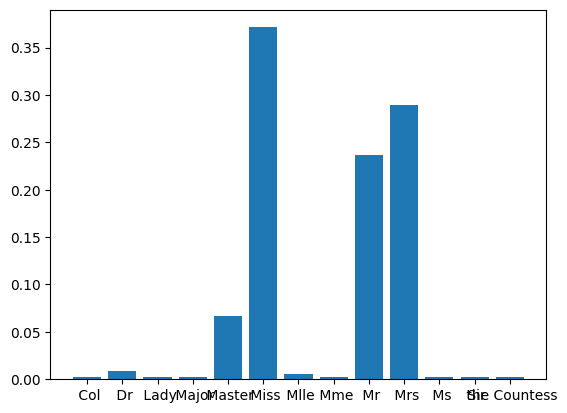

In [3406]:
dfSurvive = df[df['Survived'] ==  1]
group = dfSurvive.groupby('Title')['Survived'].count()
total_survived = dfSurvive['Survived'].count()
plt.bar(group.index, group.div(total_survived))
plt.show()

-> Most Females survived. Women from higher socio economic backgrounds had a 100% survival rate(the Countess, Lady). Males had a lower survival rate but again, men from higher socio economic backgrounds had a higher survival rate. 

Step 9) Plot a bar chart of the average fare for those that survived and those that did not survive.

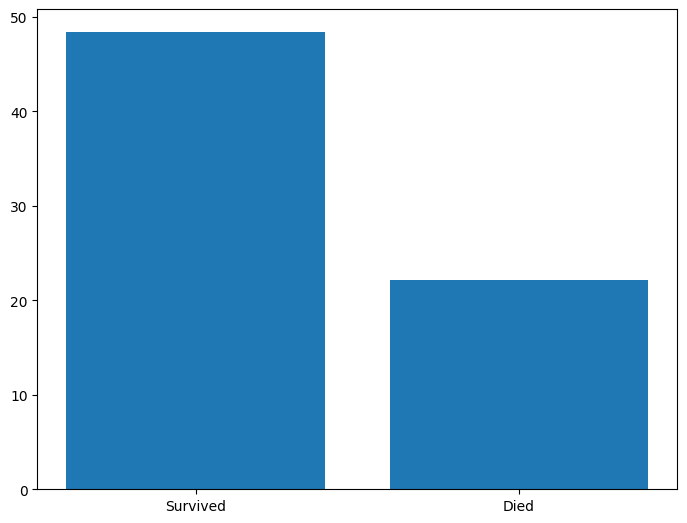

In [3407]:
dfSurvived = df.loc[df['Survived'] == 1, 'Fare'].mean()
dfDied = df.loc[df['Survived'] == 0, 'Fare'].mean()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_vals = ['Survived', 'Died']
y_vals = [dfSurvived, dfDied]
ax.bar(x_vals, y_vals)
plt.show()



In [3408]:

print (df.groupby('Survived').Fare.mean())

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


-> Those who survived payed a higher fare than those who did not. This could be because a higher priority to be saved was given to those of higher socio-economic standing.

Step 10) Create a boxplot for the fare of those that survived and those that did not survive. 

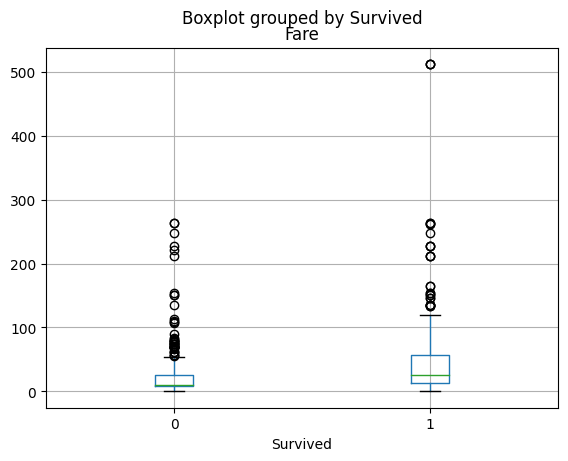

In [3409]:

boxplot = df.boxplot(column = 'Fare', by = 'Survived')

-> Those who did not survive have more outliers concentrated at a lower fare than who did.

Step 11) Create a function to subtract the mean fare from the actual fare then divide by the standard deviation 

In [3410]:

def sub_std_fare(df):
    # subtract mean fare from actual fare
    mean_fare = df['Fare'].mean()
    std_fare = df['Fare'].std()
    df['sub_std_fare'] = (df['Fare'] - mean_fare)/std_fare 
    # divide by stdev
    return df['sub_std_fare']

df['sub_std_fare'] = sub_std_fare(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Last Name,Title,First Name,Middle Name,sub_std_fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,Braund,Mr,Owen,Harris,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,Cumings,Mrs,John,Bradley,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Laina,None,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,Futrelle,Mrs,Jacques,Heath,0.420494
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,Allen,Mr,William,Henry,-0.486064


Step 12) Remove all non-numerical columns from the dataframe. 

In [3411]:
df1 = df._get_numeric_data()
df1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,sub_std_fare
0,1,0,3,0,22.0,1,0,7.2500,-0.502163
1,2,1,1,1,38.0,1,0,71.2833,0.786404
2,3,1,3,1,26.0,0,0,7.9250,-0.488580
3,4,1,1,1,35.0,1,0,53.1000,0.420494
4,5,0,3,0,35.0,0,0,8.0500,-0.486064
